In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [11]:
df=pd.read_csv(r"C:\Users\Bhaskar Konda\Desktop\3rd year\sem6\da\mini project\data\Training_data.csv")

In [12]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [13]:
df.isnull().sum()

y      0
x1     0
x2     0
x3     0
x4     0
      ..
x57    0
x58    0
x59    0
x60    0
x61    0
Length: 62, dtype: int64

In [14]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,...,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000
mean,0.006488,0.025401,-0.470455,1.278904,-39.528380,-0.152940,0.746041,0.020763,-0.016455,-0.004272,...,1.427684,0.309014,-0.094413,-5.847789,27.762041,0.789931,-0.004297,0.692014,0.002432,0.001004
std,0.080293,0.687200,4.956759,6.125960,136.803500,0.571198,36.168932,0.109847,0.063025,0.160045,...,6.679059,4.912749,3.195014,73.145344,83.268383,2.457149,0.057447,6.599906,0.004427,0.031674
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-16.555008,-14.211369,-5.370937,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.006588,0.000000
25%,0.000000,-0.502545,-3.380133,-3.325962,-140.882767,-0.525385,-29.431690,-0.049319,-0.054634,-0.059966,...,-4.634475,-3.335087,-4.889306,-48.173703,-35.689654,-1.470630,0.006213,0.291218,-0.001279,0.000000
50%,0.000000,0.143820,-0.755299,0.424011,-67.259882,-0.246004,9.339607,0.010803,-0.021135,-0.030057,...,1.060959,1.079891,0.662045,4.556034,26.803293,1.337108,0.017437,0.804430,0.002398,0.000000
75%,0.000000,0.468526,1.400402,4.437452,46.157211,0.081388,28.936615,0.080690,0.018844,-0.000149,...,7.965622,3.341304,2.648017,38.680789,80.596674,2.863048,0.023250,1.365876,0.005702,0.000000
max,1.000000,2.517970,16.734899,15.900116,296.772589,4.239385,68.886910,1.705590,0.788826,3.206675,...,14.180588,11.148006,6.054363,287.252017,252.147455,6.922008,0.060264,5.756678,0.020510,1.000000


In [15]:
df.nunique()

y          2
x1     10408
x2     11531
x3     11902
x4     12319
       ...  
x57      932
x58     8983
x59     9479
x60     8276
x61        2
Length: 62, dtype: int64

In [16]:
df.shape

(12946, 62)

### BALANCING THE DATA

In [17]:
from imblearn.over_sampling import SMOTE
# Assuming y is your target variable
# Assuming X is your feature matrix

# Extracting 'y' as the first column
y = df.iloc[:, 0]

# Extracting the rest of the columns as features
X = df.iloc[:, 1:]

# Convert y to a binary target variable (if not already binary)
# For example, if y has multiple classes, you might want to convert it to binary
# For this example, let's assume 1 is the minority class and 0 is the majority class
y_binary = (y == 1).astype(int)

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binary)

# Now, X_resampled and y_resampled contain the balanced dataset

In [18]:
# Count occurrences of zeros and ones in y
counts = y_resampled.value_counts()

# Display counts
print("Counts of zeros and ones:")
print(counts)




Counts of zeros and ones:
y
0    12862
1    12862
Name: count, dtype: int64


In [19]:
X_resampled.shape

(25724, 61)

In [20]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [21]:
df_test=pd.read_csv(r"C:\Users\Bhaskar Konda\Desktop\3rd year\sem6\da\mini project\data\Test_data.csv")

In [22]:
df_test.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,0,0.324195,-0.299939,-4.247989,-12.023035,1.108297,47.405922,0.020874,0.088731,-0.059966,...,0.596603,7.18243,0.587533,24.477970,-36.199652,-0.860218,-0.002973,1.257273,-0.001142,0
1,0,0.268249,-0.227685,-4.563740,-11.925134,1.126791,47.785256,0.020874,0.088731,-0.059966,...,0.592209,7.18243,0.587281,39.362369,-36.157263,-0.219349,-0.002659,0.666094,-0.001138,0
2,0,0.302200,-0.300580,-4.235540,-11.811151,1.145284,48.164559,0.020874,0.088731,-0.059966,...,0.587814,7.18243,0.587030,40.097476,-36.114890,-0.219349,-0.002346,0.156939,-0.001134,0
3,0,0.269202,-0.360017,-4.215428,-11.663812,1.163778,48.543892,0.020874,0.088731,-0.059966,...,0.583420,7.18243,0.586777,38.846012,-36.072501,0.391002,-0.002032,0.643130,-0.001131,0
4,0,0.271205,-0.317740,-4.311570,-11.516473,1.182272,48.282418,0.020874,0.088731,-0.059966,...,0.579025,7.18243,0.586525,36.684390,-36.030112,-0.555042,-0.001719,1.389887,-0.001127,0


### spliting into test and training dataset

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable name
# Splitting the training dataset into features and target
y_train = df['y']
X_train = df.drop('y', axis=1)

# Splitting the testing dataset into features and target
y_test = df_test['y']
X_test = df_test.drop('y', axis=1)

# Optionally, you can perform further preprocessing or feature engineering on X_train and X_test

# Now, you have X_train, y_train, X_test, and y_test ready for model training and evaluation


### scaling the data

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

# Now, X_scaled contains the scaled features


In [25]:
X_scaled_train

array([[ 0.5111726 , -0.83242681, -0.87739182, ...,  0.03957864,
         0.82302073, -0.03170458],
       [ 0.65532106, -0.82154569, -0.86475706, ...,  0.06038019,
         0.82460194, -0.03170458],
       [ 0.49252084, -0.8495675 , -0.91940987, ...,  0.17402833,
         0.82618314, -0.03170458],
       ...,
       [ 0.33891334,  0.01708026, -0.94721442, ...,  0.04655295,
        -0.80990867, -0.03170458],
       [ 0.31121001,  0.00678765, -0.91452833, ..., -0.08615468,
        -0.80900512, -0.03170458],
       [ 0.34507336,  0.03536731, -0.92657229, ..., -0.03995163,
        -0.80810158, -0.03170458]])

In [26]:
print("Shape of:", X_scaled_train.shape)
print("Shape of :", X_scaled_test.shape)


Shape of: (12946, 61)
Shape of : (5452, 61)


### Model building

Random Forest:


Accuracy: 0.9840425531914894
Precision: 0.2235294117647059
Recall: 0.475
F1 Score: 0.304


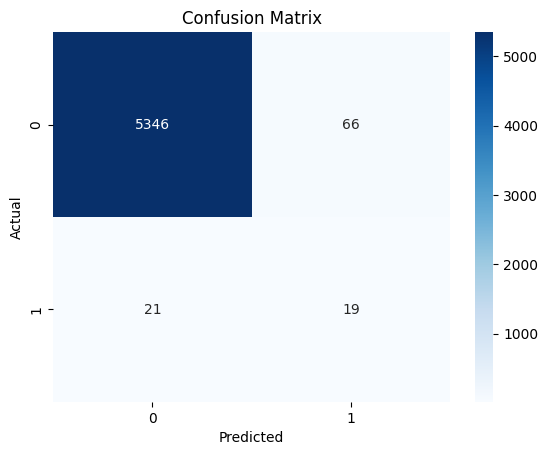

Support Vector Machine:
Accuracy: 0.9924798239178283
Precision: 0.42857142857142855
Recall: 0.075
F1 Score: 0.1276595744680851


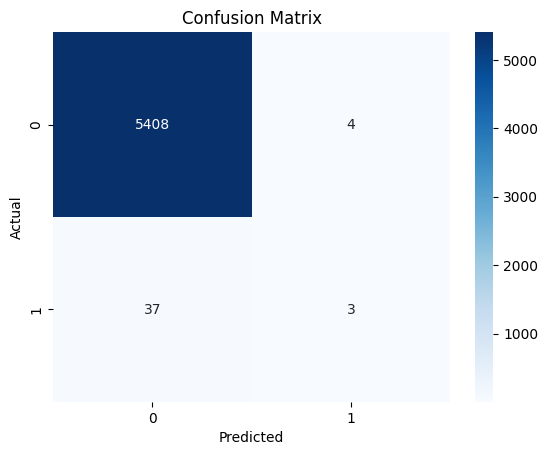

Gradient Boosting:
Accuracy: 0.9035216434336023
Precision: 0.01593625498007968
Recall: 0.2
F1 Score: 0.02952029520295203


/home/venkatasai24/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


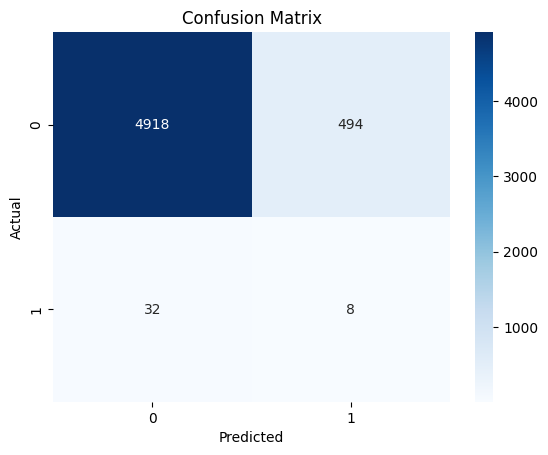

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate and print evaluation metrics
def evaluate_model(model, X_scaled_test, y_test):
    # Make predictions
    y_pred = model.predict(X_scaled_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Display evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



# Random Forest
print("Random Forest:")
random_forest = RandomForestClassifier()
random_forest.fit(X_scaled_train, y_train)
evaluate_model(random_forest, X_scaled_test, y_test)

# Support Vector Machine
print("Support Vector Machine:")
svm = SVC()
svm.fit(X_scaled_train, y_train)
evaluate_model(svm, X_scaled_test, y_test)

# Gradient Boosting
print("Gradient Boosting:")
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
evaluate_model(gradient_boosting, X_scaled_test, y_test)
